In [1]:
# This note book will optimize the model using gradinet descent for linear regression. 
#it will use the flight delay prediction model
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random
import os

In [2]:
feature_data = pd.read_csv("D:/Suyog's Docs/Data/FlightData/features.csv")#,header=None, names=flight_headers, dtype=flight_dtypes) #, header =[1])
feature_data = feature_data.drop(feature_data.columns[0],axis=1)
feature_data.head(5)

,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,TAXI_IN,ARRIVAL_DELAY,departure_time_earlymorning,departure_time_morning,departure_time_afternoon,arrival_time_earlymorning,arrival_time_morning,arrival_time_afternoon
0,-0.677271,-0.276785,-1.487592,-1.641208,-0.506501,-1.186866,0,0,0,0,0,0
1,-0.290225,0.284550,-0.886651,-1.590542,0.427826,0.081592,0,0,0,1,0,0
2,-0.599862,-1.118787,-0.261593,-1.674985,0.427826,-1.186866,1,0,0,1,0,0
3,-0.212816,-1.399454,0.317240,-1.742540,0.988423,0.477985,1,0,0,0,1,0
4,-0.057998,0.003882,1.095046,-1.658097,0.240961,-0.076966,0,1,0,0,1,0


In [3]:
# let us split data into target and independent variables
# there are four basic assumptoins of linear regression model , these are 
# 1. Linearity : the relation between X and Y should be linear
# 2. Homoscedasticity: The variance of residual is the same for any value of X
# 3. Independence: Observations are independent of each other.
# 4. Normality: For any fixed value of X, Y is normally distributed.
y_labels= feature_data.pop('ARRIVAL_DELAY').values
x_labels = feature_data.values

In [4]:
# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(x_labels, y_labels, test_size=0.25, random_state=0)

In [5]:
X_train.shape[0]

2982

In [6]:
X_test.shape[0]

994

In [33]:
m,n = X_train.shape
Y = y_train.transpose()

In [17]:
#Now add a column of ones to X for easier matrix manipulation of our hypothesis and cost function later on.
#
xo = np.hstack((np.ones((m, 1)), X_train))
print(xo)

[[ 1.          3.03836291 -0.41711843 ...  0.          1.
   0.        ]
 [ 1.          3.34799903 -1.25912022 ...  0.          0.
   0.        ]
 [ 1.         -0.44504353 -0.2767848  ...  0.          1.
   0.        ]
 ...
 [ 1.         -0.36763449 -0.2767848  ...  1.          0.
   0.        ]
 [ 1.          2.34168162 -1.25912022 ...  0.          0.
   0.        ]
 [ 1.         -0.90949772  1.40721879 ...  0.          0.
   0.        ]]


In [25]:
#repeat = number of times to repeat gradient descent
#theta = a theta for each feature of X, add one more column for theta 0
#costhistory = keep the cost of each iteration of gradient descent
repeat = 1000
lrate = 0.01
theta = np.zeros((n+1))

In [35]:
#Lets define a cost function which gradient descent will use to determine the cost of each theta. 
#The cost function will implement the following cost equation.
def computeCost(X, y, theta):
    m = len(y) # number of training examples
    diff = np.matmul(X, theta) - y
    J = 1 / (2 * m) * np.matmul(diff, diff)
    return J

In [23]:
#calculate a new theta on each loop and keep track of its cost.
def gradientDescent(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = len(y) # number of training examples
    J_history = []
  # repeat until convergance
    for i in range(num_iters):
        hc = np.matmul(X, theta) - y
        theta -= alpha / m * np.matmul(X.transpose(), hc)
    # Save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

In [36]:
theta, J_history = gradientDescent(xo, Y, theta, lrate, repeat)
# Display gradient descent's result
print('Best theta computed from gradient descent: ')
print(f' {theta} ')

Best theta computed from gradient descent: 
 [ 0.02884703  0.69937654  0.35855561 -0.04495017 -0.12849497  0.28328593
 -0.06098834 -0.00195219  0.         -0.05575951 -0.01955722  0.        ] 


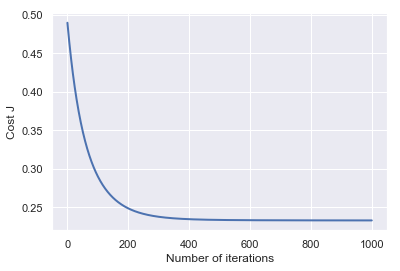

In [38]:
plt.plot(np.arange(repeat), J_history, '-b', LineWidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [39]:
y_pred = np.matmul(xo, theta)

In [43]:
from sklearn.metrics import mean_squared_error
print('RMSE: ',np.sqrt(mean_squared_error(y_train, y_pred)))
# calculate our own accuracy where prediction within 10% is o
diff = (y_pred / y_pred * 100)
print('Mean of results: ',diff.mean())
print('Deviation of results: ',diff.std())
print('Results within 10% support/resistance: ', len(np.where(np.logical_and(diff>=90, diff<=110))[0]) / m * 100)

RMSE:  0.6828768469355391
Mean of results:  100.0
Deviation of results:  0.0
Results within 10% support/resistance:  100.0


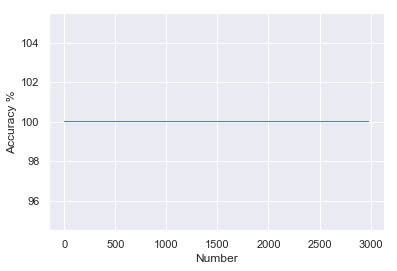

In [44]:
plt.plot(np.arange(m), diff, '-b', LineWidth=1)
plt.xlabel('Number')
plt.ylabel('Accuracy %')
plt.show()